# Evaluation

In this hackathon, you will use this notebook to evaluate the performance of your machine learning pipeline. The notebook is designed to assess the entire pipeline, from data preprocessing to making predictions, ensuring that your solution is practical, efficient, and accurate.


**Important Note:**
- The evaluation runs on a `single` CPU core to ensure fair resource usage comparisons.
- It assesses the pipeline’s performance as a whole, not just the final model’s predictions.

---

### 1. What the Evaluation Measures

The notebook evaluates your pipeline on several metrics:

#### **1.	Accuracy and Model Performance:**

- **Accuracy**: How many predictions were correct.
- **F1 Score**: A balanced measure of precision and recall, especially for imbalanced datasets.
- **Confusion Matrix**: A detailed breakdown of your model’s predictions across the following classes:
    - `Priority`: The most important class, representing clear and usable images. Misclassifying these has the greatest negative impact.
	- `Noisy` & `Blurry`: Impure images that could potentially be recovered through preprocessing. Errors here are less critical but still significant.
	- `Corrupt` & `Missing_Data`: The least important classes, representing images with severe issues or no usable data. Misclassifications here have the smallest impact.

#### **2. Evaluation Time:**

- **What we measure**: How long your pipeline takes to preprocess the data and make predictions.
- **Single CPU Core**: The evaluation runs on a `single` CPU core, not just for fairness, but to simulate a resource-constrained environment where computational resources are limited.
- **Why it matters**: Faster pipelines are more practical and scalable, especially in environments with strict performance or resource limitations.

#### **3. Memory Usage:**

- **Peak Memory Usage:** Maximum memory used during pipeline execution.
- **Average CPU Usage:** Percentage of a single core used throughout the process.
- **Why it matters:** CubeSat will use a processor with limited memory, and the memory utilization must fit within available memory.

#### **4. Algorithm Code Size:**

- The total size of your pipeline, including the serialized model and preprocessing function, measured in megabytes (MB).
- Algorithm code must fit within a limited available memory

---

#### Import test data

In [1]:
import numpy as np
# first let us load the testing data
test_images = np.load('data/test_images.npy')      # Load image test data
test_labels = np.load('data/test_labels.npy')      # Load label test data

**Note:** You can also use this notebook to evaluate trained models on the validation set.

#### Import Evaluation function

In [2]:
from source.evaluate import evaluate_pipeline # A built-in function to evaluate a given ML pipeline by preprocessing, predicting, and calculating performance metrics.

**Inputs:**
  
- **model**: The trained machine learning model to evaluate.
- **X_test_raw**: Raw test data that needs to be preprocessed before evaluation.
- **y_test**: True labels corresponding to the test data for performance comparison.
- **preprocessing_fn**: A function used to preprocess the raw test data.
    
**Outputs:**

- **metrics**: A dictionary containing various evaluation metrics like accuracy, F1 score, evaluation time, memory usage, CPU usage, and algorithm code size.

---

### 2. ML: Evaluation (3rd notebook)

#### Preprocessing (Testing data)

Applying consistent preprocessing to both training and testing data ensures accurate predictions, prevents mismatches, and improves model evaluation. Combining all steps into one function enhances consistency, tracks execution time, and optimizes resource usage.

In [3]:
def preprocessing_fn_ML(X): # We apply the same pre-processing steps implemented in Notebook 3.
    from skimage.color import rgb2gray
    from skimage.transform import resize
    
    # Normalize the data to [0, 1]
    X_pre = X.astype('float32') / 255.0
    
    # Convert to grayscale
    X_pre = np.array([rgb2gray(image) for image in X_pre])
    
    # Resize images to 64x64 pixels
    X_pre = np.array([resize(image, (64, 64), anti_aliasing=True) for image in X_pre])
    
    # Flatten the images
    num_samples = X_pre.shape[0]
    X_pre = X_pre.reshape(num_samples, -1)
    
    return X_pre

#### Import ML model

In [4]:
import pickle
# Load the ml model from the 3rd notebook
with open('models/sgd_model.pkl', 'rb') as file:
    sgd_model = pickle.load(file)

#### ML Evaluation


### Evaluation Metrics ###

Evaluation Time:       35.55 seconds (The time it took for the pipeline to preprocess data and make predictions.)
Peak Memory Usage:     18535.05 MB (The maximum memory used during evaluation.)
Average CPU Usage:     94.19 % (The % shows how much of one CPU core was used during the evaluation.)
Algorithm code size:         0.08 MB (The size of the trained model and preprocessing function.)
Accuracy:              0.452 (The percentage of correctly classified samples.)
F1 Score:              0.387 (A balance of precision and recall, useful for imbalanced datasets.)

### Confusion Matrix ###



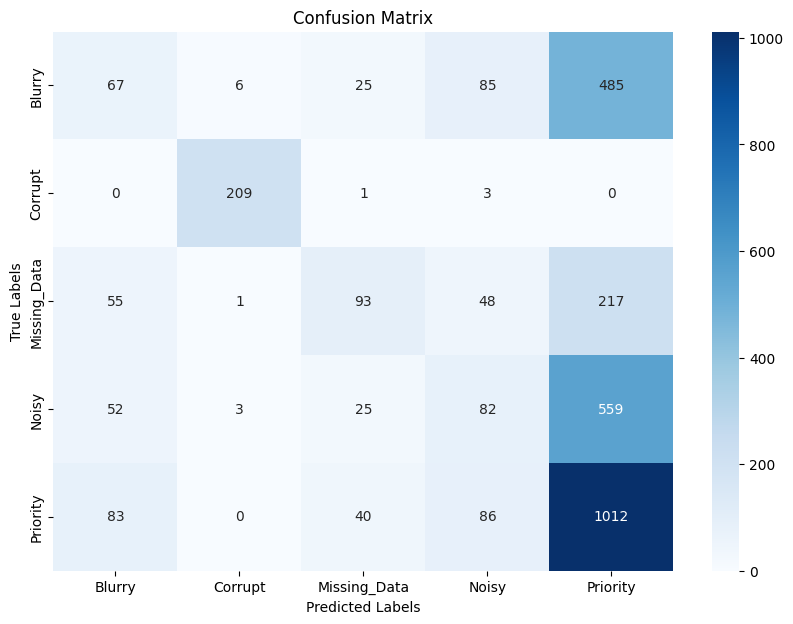

In [5]:
# Assuming you have:
# - A trained model named like 'lr_model'
# - Raw test data 'X_test_raw'
# - True labels 'y_test'
# - All pre-processing methods gathered in one function


# Evaluate the pipeline
metrics = evaluate_pipeline(sgd_model, test_images, test_labels, preprocessing_fn_ML)



---

### 3. CubeSatNet_CNN Evaluation

#### preprocessing

In [6]:
def preprocessing_fn_CNN(X):  # we did not use any preprocessing in notebook 4

    return X

#### Import CNN model

In [7]:
from keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=5)

# Load the CNN model from the 4th notebook
with open('models/cnn_model.pkl', 'rb') as file:
    cnn_model = pickle.load(file)

2025-01-08 16:25:19.067049: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 16:25:20.298813: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 16:25:20.643078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 16:25:21.398004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 16:25:21.598407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 16:25:22.310910: I tensorflow/core/platform/cpu_feature_gu

#### Evaluate the CNN pipeline

102/102 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step

### Evaluation Metrics ###

Evaluation Time:       265.27 seconds (The time it took for the pipeline to preprocess data and make predictions.)
Peak Memory Usage:     8455.79 MB (The maximum memory used during evaluation.)
Average CPU Usage:     89.29 % (The % shows how much of one CPU core was used during the evaluation.)
Algorithm code size:         1.16 MB (The size of the trained model and preprocessing function.)
Accuracy:              0.998 (The percentage of correctly classified samples.)
F1 Score:              0.998 (A balance of precision and recall, useful for imbalanced datasets.)

### Confusion Matrix ###



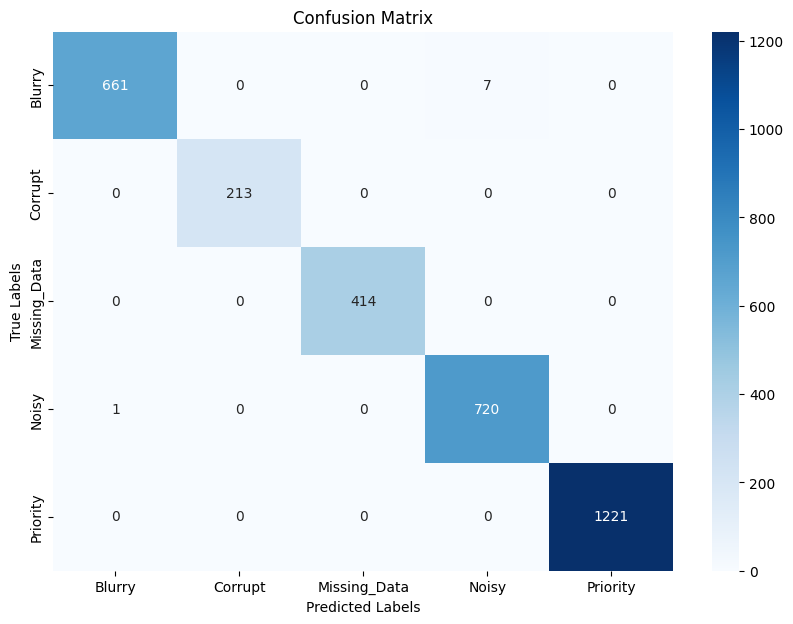

In [8]:
# Evaluate the pipeline
metrics = evaluate_pipeline(cnn_model, test_images, test_labels, preprocessing_fn_CNN)


---

##### **⚠️ Freeing up Space**

In [10]:
import gc

# Remove the data from memory
del sgd_model, cnn_model, test_images, test_labels

# Force garbage collection to free up memory
gc.collect()

# Clear the input/output cache
print("Data and models removed from memory.")

Data and models removed from memory.


---

**Note:**

1.	You can also use the `evaluate_pipeline` function to evaluate your validation set data.
2.	Please do not modify the `evaluate_pipeline` function.

Best of luck with the hackathon challenge! 🎉 We look forward to seeing your final results and pipelines! 🚀